In [1]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# N=3

In [29]:
N = 3                             # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

Text(0.5, 0.03, 'time (t)')

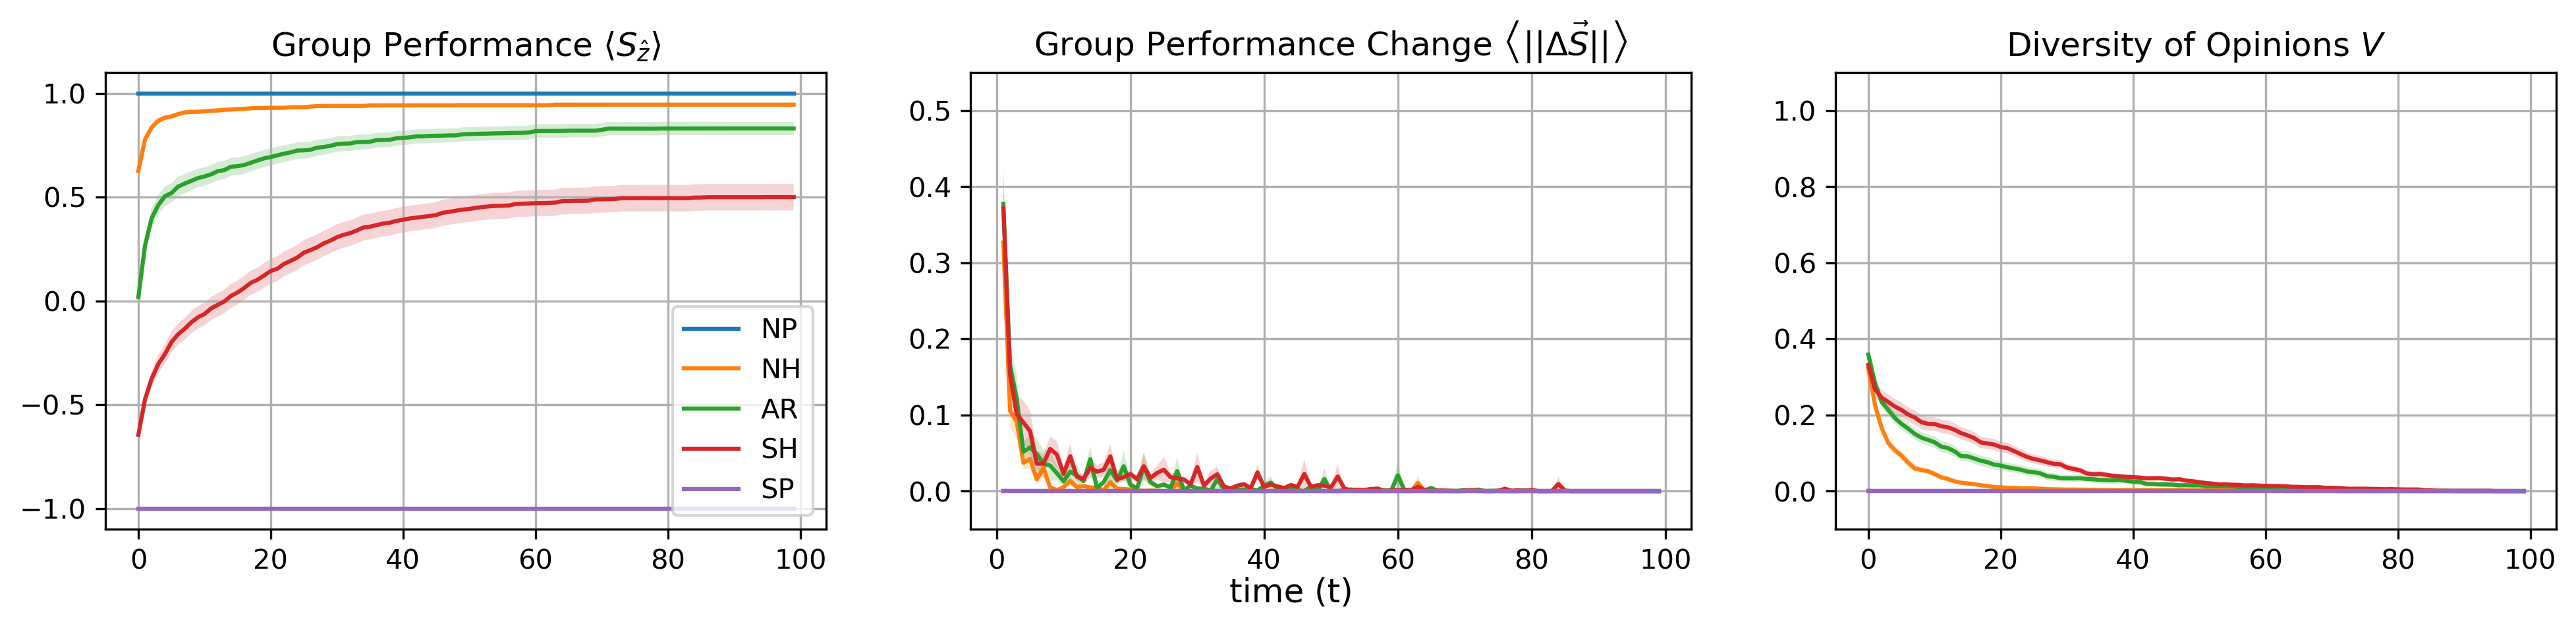

In [30]:
fig,axs = plt.subplots(1,3,figsize=(16,3), dpi=300)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, '-', label = config)
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, alpha = 0.2)
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, '-')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, alpha = 0.2)
axs[1].grid()

axs[2].set_title(r'Diversity of Opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, '-')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, alpha = 0.2)
axs[2].grid()

fig.suptitle("time (t)", y = 0.03)

# N=3 ver2

In [35]:
N = 3                             # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

Text(0.5, 0.03, 'time (t)')

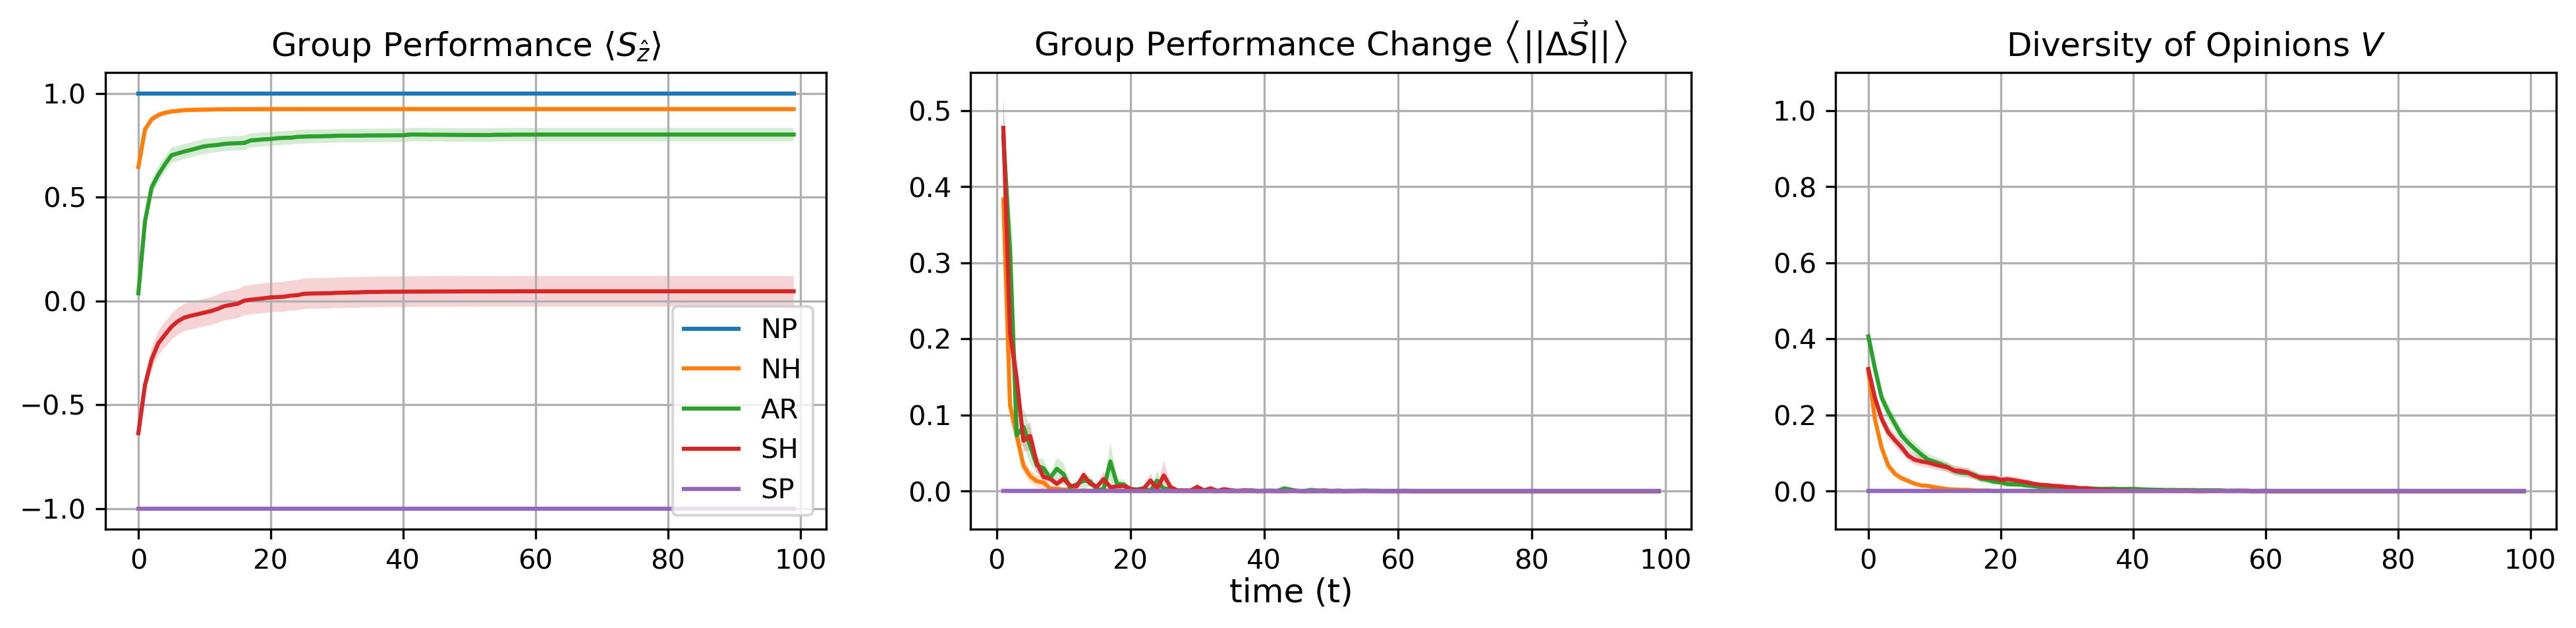

In [36]:
fig,axs = plt.subplots(1,3,figsize=(16,3), dpi=300)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, '-', label = config)
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, alpha = 0.2)
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, '-')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, alpha = 0.2)
axs[1].grid()

axs[2].set_title(r'Diversity of Opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, '-')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, alpha = 0.2)
axs[2].grid()

fig.suptitle("time (t)", y = 0.03)

# N=5 ver2

In [37]:
N = 5                            # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

Text(0.5, 0.03, 'time (t)')

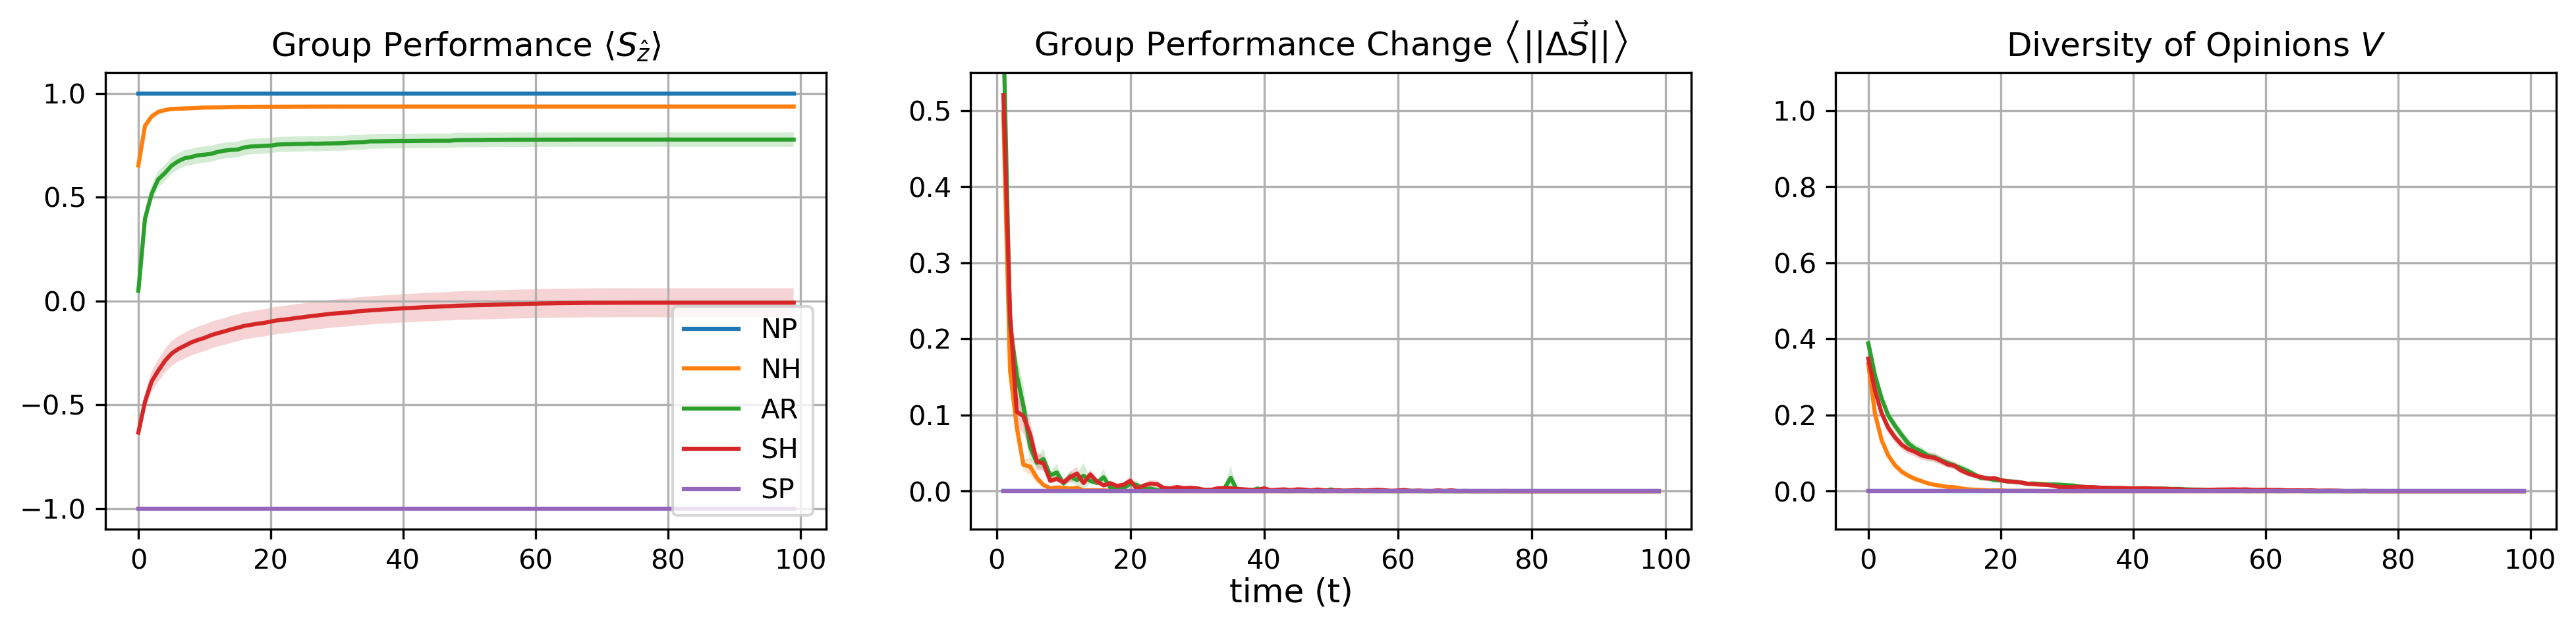

In [38]:
fig,axs = plt.subplots(1,3,figsize=(16,3), dpi=300)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, '-', label = config)
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, alpha = 0.2)
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, '-')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, alpha = 0.2)
axs[1].grid()

axs[2].set_title(r'Diversity of Opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, '-')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, alpha = 0.2)
axs[2].grid()

fig.suptitle("time (t)", y = 0.03)

# N=5

In [31]:
N = 5                            # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

Text(0.5, 0.03, 'time (t)')

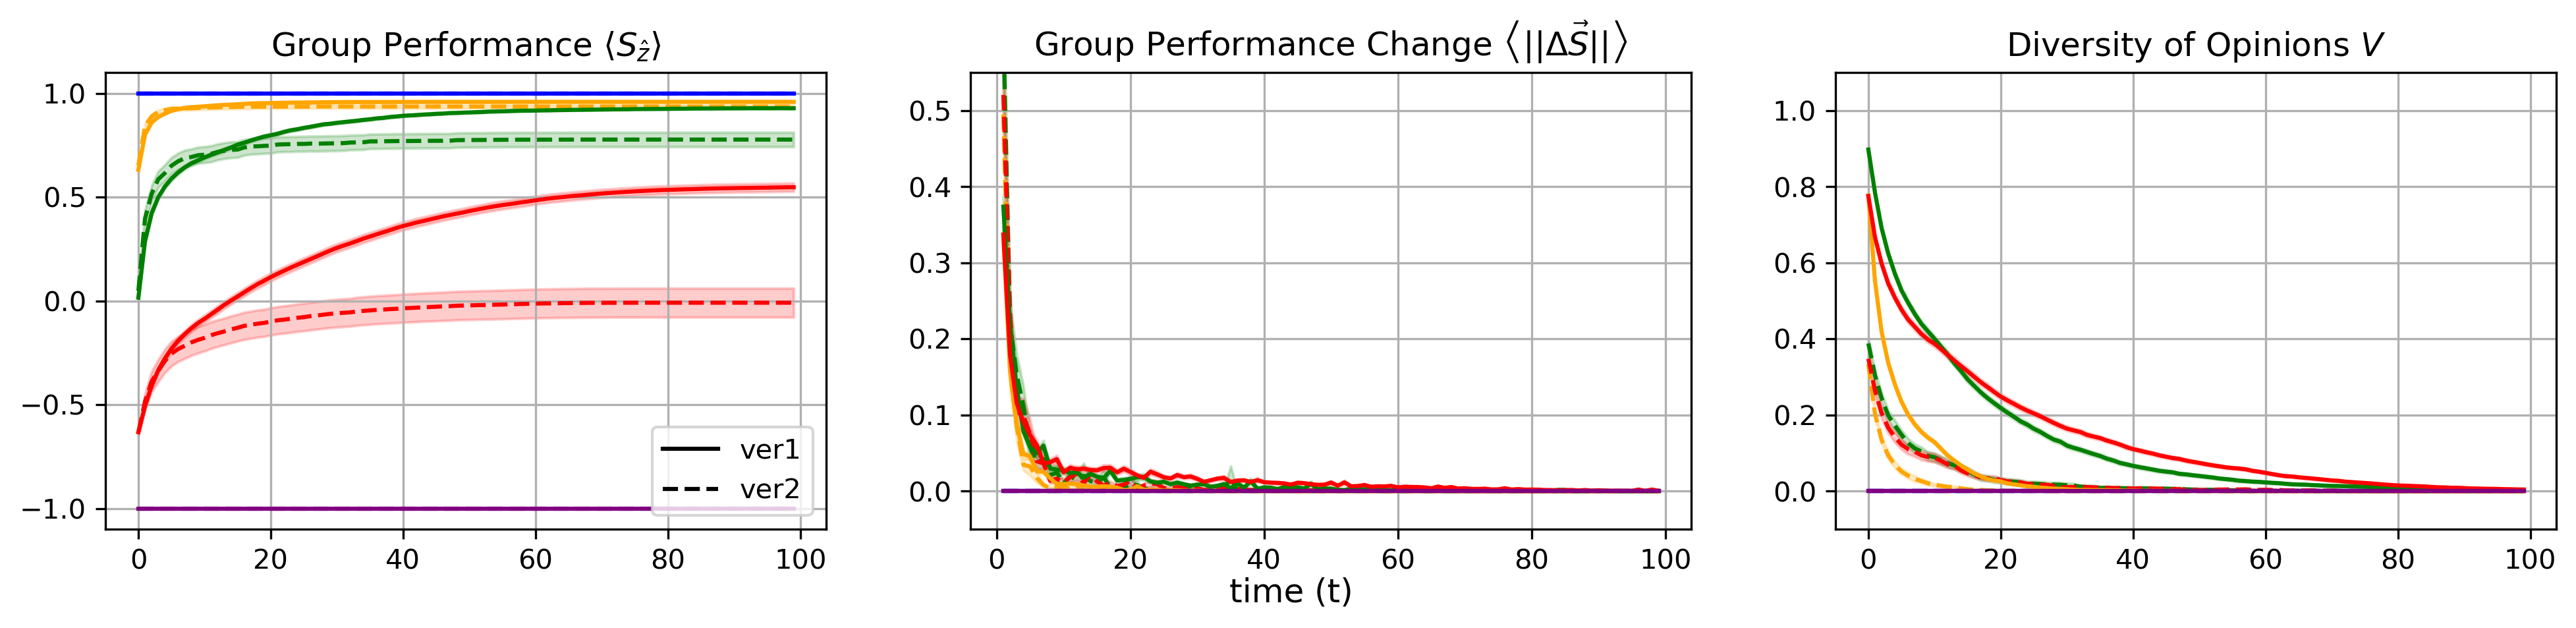

In [9]:
fig,axs = plt.subplots(1,3,figsize=(16,3), dpi=300)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# ver2
N = 5                            # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step
spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']
colors = ['blue','orange','green', 'red','purple']

t = np.arange(0, MC_step)

S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"2Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"2Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"2DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, color=colors[i], linestyle='--')
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)

axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, color=colors[i], linestyle='--')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)

axs[2].set_title(r'Diversity of Opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, color=colors[i], linestyle='--')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)

# ver1
N = 5                            # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step
spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, color=colors[i], linestyle='-')
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[0].grid()

for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, color=colors[i], linestyle='-')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)
axs[1].grid()

for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, color=colors[i], linestyle='-')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[2].grid()


axs[0].plot(1,1,color='k', linestyle='-', label='ver1')
axs[0].plot(1,1,color='k', linestyle='--', label='ver2')
axs[0].legend(loc='lower right')

fig.suptitle("time (t)", y = 0.03)

# N=10 ver2

In [40]:
N = 10                             # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

Text(0.5, 0.03, 'time (t)')

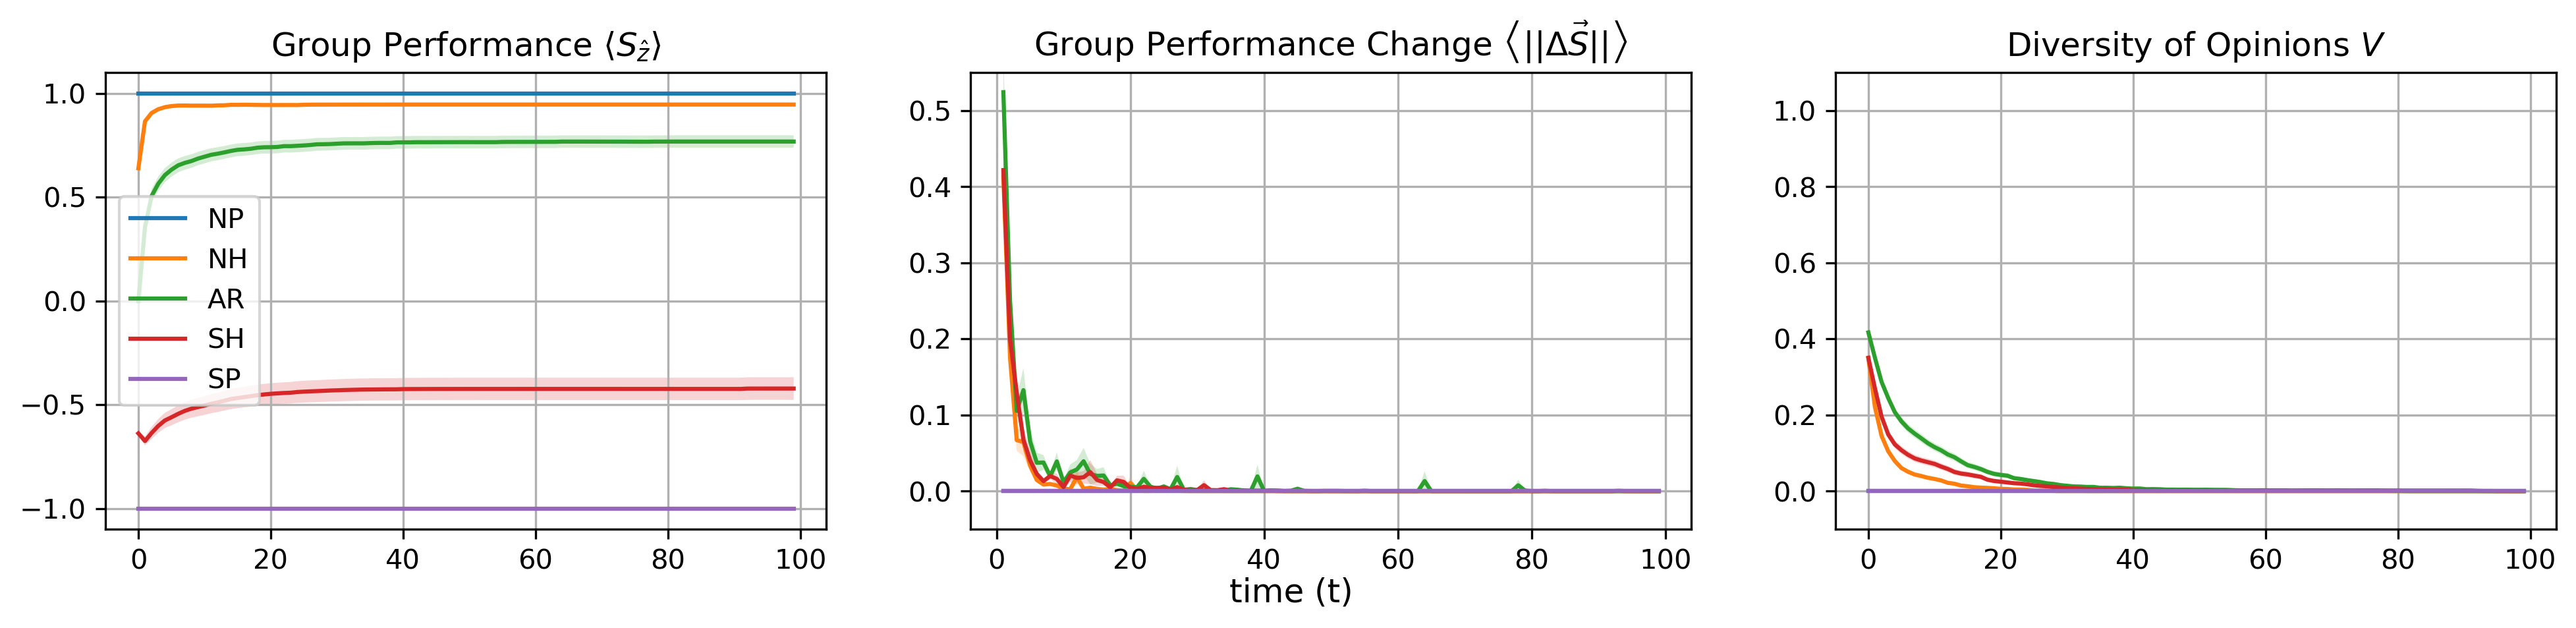

In [41]:
fig,axs = plt.subplots(1,3,figsize=(16,3), dpi=300)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, '-', label = config)
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, alpha = 0.2)
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, '-')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, alpha = 0.2)
axs[1].grid()

axs[2].set_title(r'Diversity of Opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, '-')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, alpha = 0.2)
axs[2].grid()

fig.suptitle("time (t)", y = 0.03)

# N=10

In [33]:
N = 10                             # No. of agents
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NP', 'NH', 'AR', 'SH', 'SP']

Text(0.5, 0.03, 'time (t)')

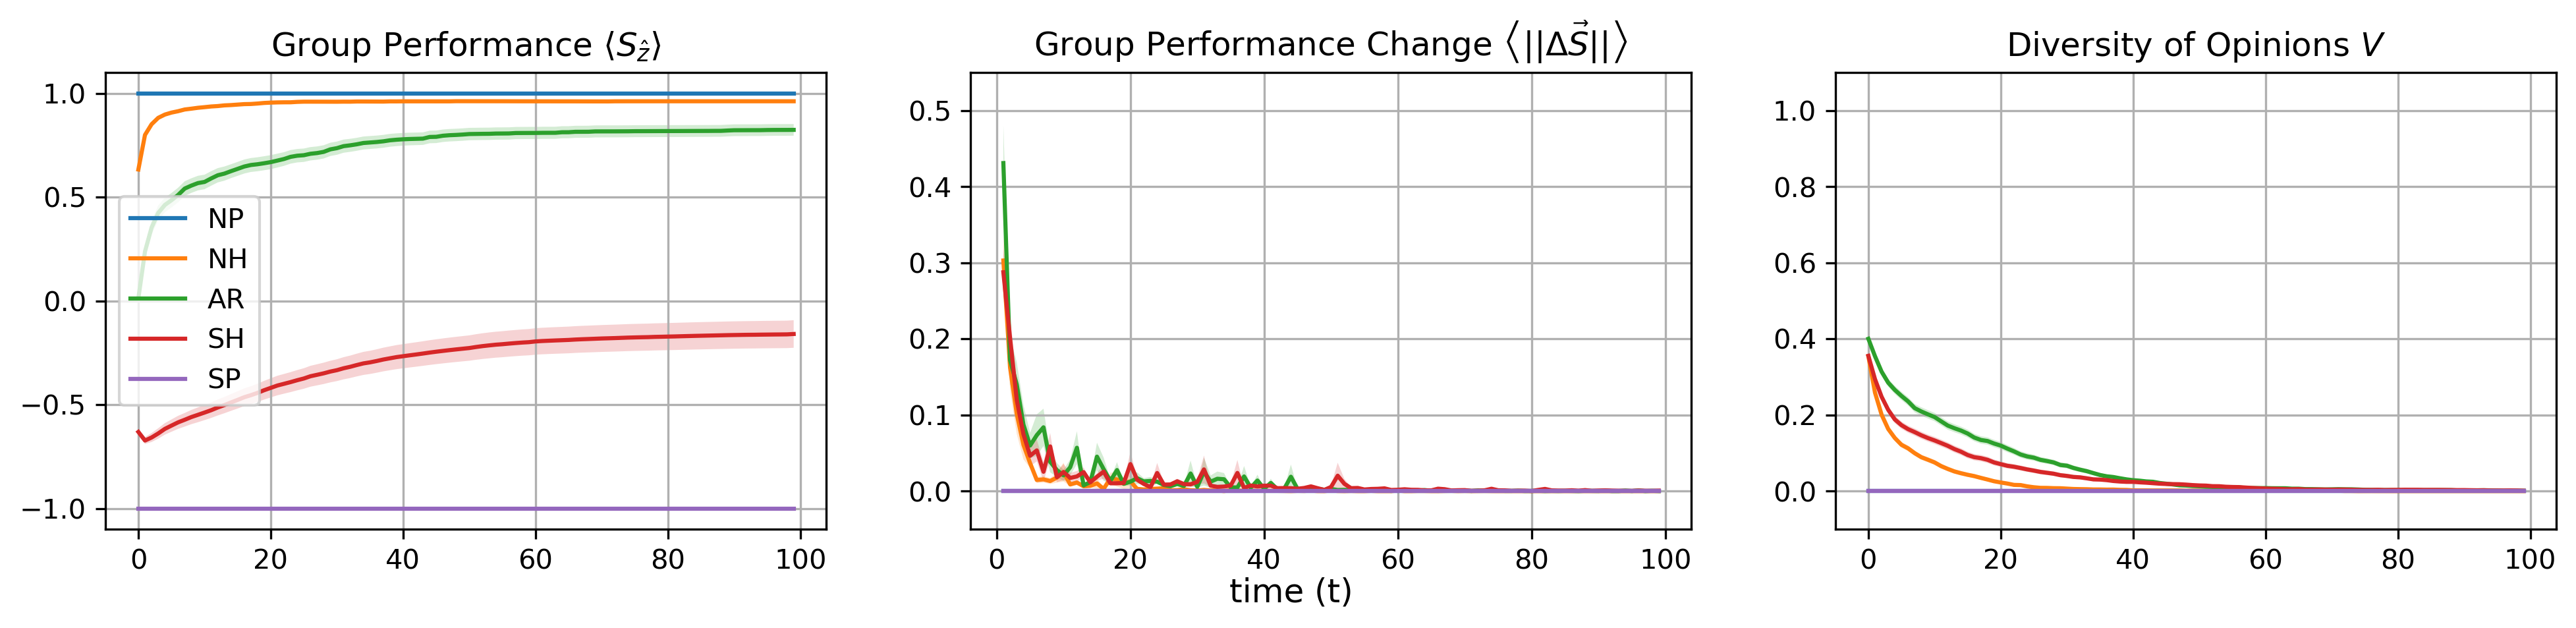

In [34]:
fig,axs = plt.subplots(1,3,figsize=(16,3), dpi=300)

t = np.arange(0, MC_step)

axs[0].set_ylim([-1.1,1.1])
axs[1].set_ylim([-0.05,0.55])
axs[2].set_ylim([-0.1,1.1])

# N=3
S_array = []
V_array = []
del_S_array = []
for idx, config in enumerate(spin_config):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, config in enumerate(spin_config):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0].plot(t, Savg, '-', label = config)
  axs[0].fill_between(t, Savg - Sstd, Savg + Sstd, alpha = 0.2)
axs[0].legend()
axs[0].grid()

axs[1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, config in enumerate(spin_config):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1].plot(t[1:], delSavg, '-')
  axs[1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, alpha = 0.2)
axs[1].grid()

axs[2].set_title(r'Diversity of Opinions $V$')
for i, config in enumerate(spin_config):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2].plot(t, Vavg, '-')
  axs[2].fill_between(t, Vavg - Vstd, Vavg + Vstd, alpha = 0.2)
axs[2].grid()

fig.suptitle("time (t)", y = 0.03)